In [1]:
!pip install yfinance --quiet
!pip install matplotlib pandas --quiet

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Grafikler notebook içinde gösterilsin
%matplotlib inline

In [3]:
# Hisse sembolü ve tarih aralığı
ticker = "ASELS.IS"  # .IS Borsa İstanbul için gerekli
start_date = "2020-01-01"
end_date = "2024-12-31"

# Veriyi çek
data = yf.download(ticker, start=start_date, end=end_date)

# İlk 5 satırı göster
data.head()

C:\Users\baharkarabulut\AppData\Local\Temp\ipykernel_26604\699680579.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,ASELS.IS,ASELS.IS,ASELS.IS,ASELS.IS,ASELS.IS
Date,,,,,
2020-01-02,5.315210,5.325063,5.201911,5.246245,113871880
2020-01-03,5.364471,5.403879,5.147724,5.270876,223370840
2020-01-06,5.438361,5.507326,5.339840,5.359544,188498904
2020-01-07,5.522105,5.556587,5.413731,5.502401,139196000
2020-01-08,5.487622,5.541809,5.413731,5.448214,141667500


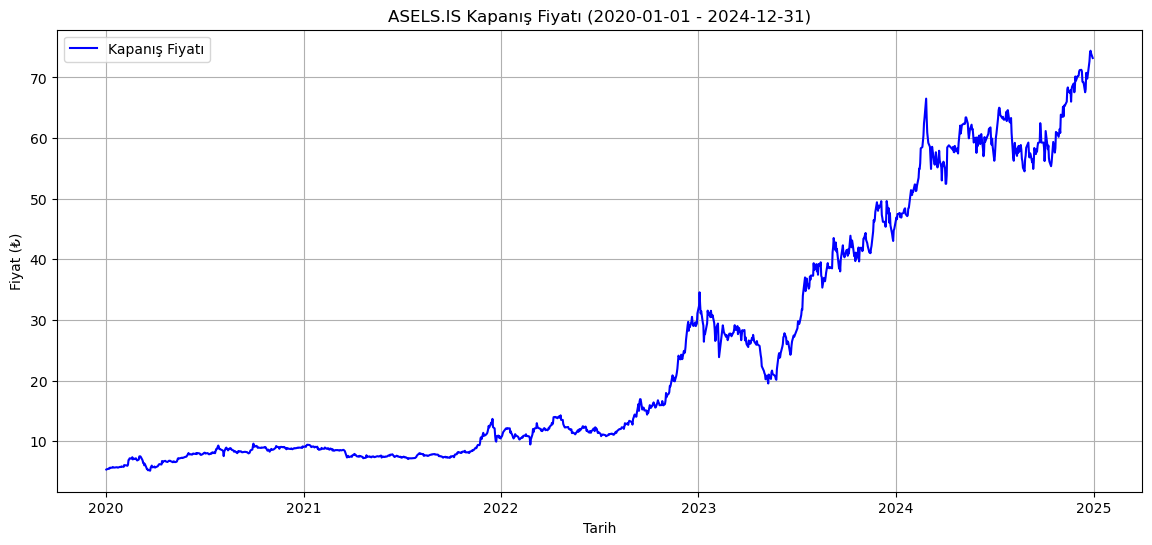

In [4]:
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Close'], label='Kapanış Fiyatı', color='blue')
plt.title(f"{ticker} Kapanış Fiyatı ({start_date} - {end_date})")
plt.xlabel("Tarih")
plt.ylabel("Fiyat (₺)")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Hareketli ortalamalar
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

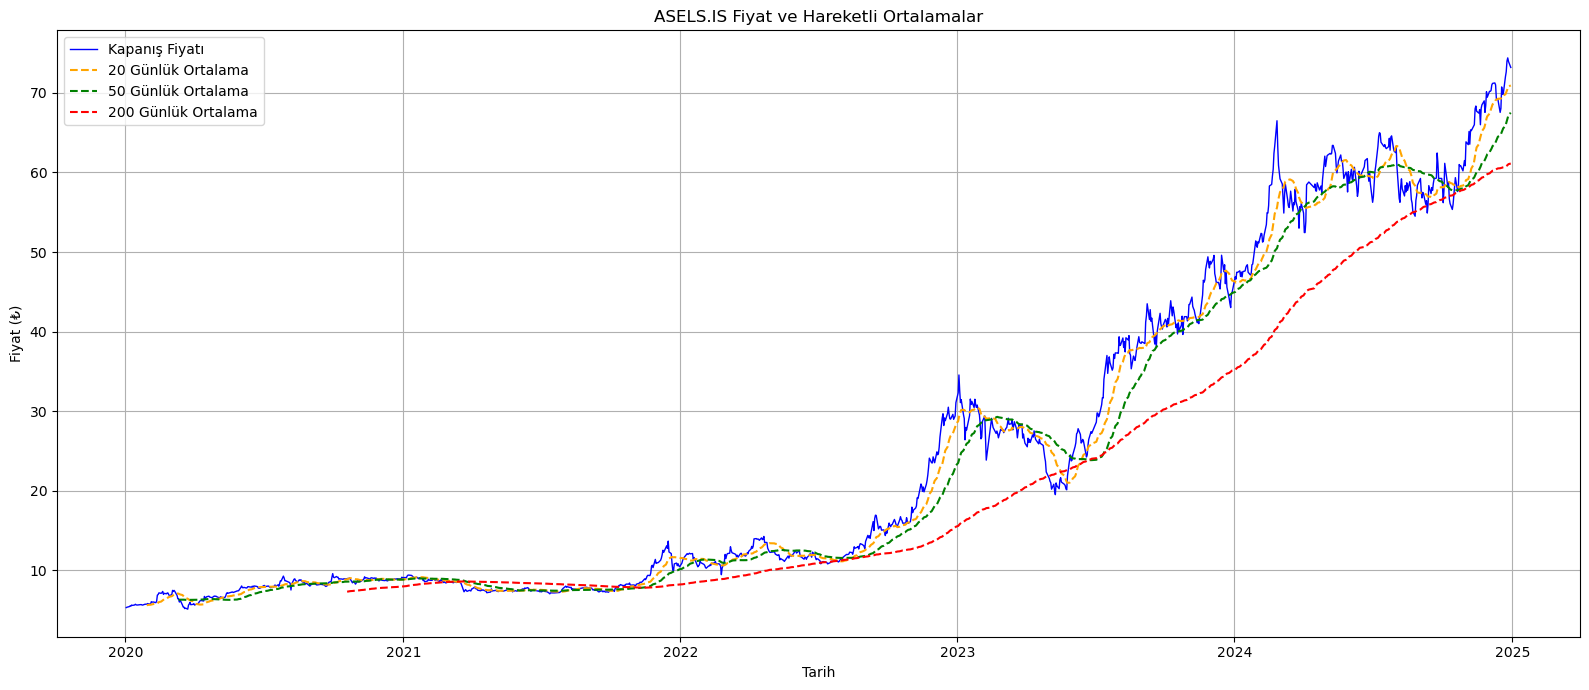

In [14]:
plt.figure(figsize=(16, 7))
plt.plot(data.index, data['Close'], label='Kapanış Fiyatı', color='blue', linewidth=1)
plt.plot(data.index, data['MA20'], label='20 Günlük Ortalama', color='orange', linestyle='--')
plt.plot(data.index, data['MA50'], label='50 Günlük Ortalama', color='green', linestyle='--')
plt.plot(data.index, data['MA200'], label='200 Günlük Ortalama', color='red', linestyle='--')

plt.title(f"{ticker} Fiyat ve Hareketli Ortalamalar")
plt.xlabel("Tarih")
plt.ylabel("Fiyat (₺)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
alis_fiyati = data.loc[data.index >= alis_tarihi, 'Close'].iloc[0]
satis_fiyati = data.loc[data.index <= satis_tarihi, 'Close'].iloc[-1]

# Eğer hala Series dönerse, ilk elemanı al:
if hasattr(alis_fiyati, 'values'):
    alis_fiyati = alis_fiyati.values[0]
if hasattr(satis_fiyati, 'values'):
    satis_fiyati = satis_fiyati.values[0]

adet = 100
kar = (satis_fiyati - alis_fiyati) * adet

print(f"📅 Alış Tarihi: {alis_tarihi} | Fiyat: {alis_fiyati:.2f}₺")
print(f"📅 Satış Tarihi: {satis_tarihi} | Fiyat: {satis_fiyati:.2f}₺")
print(f"📈 {adet} adet hisseden elde edilen net kâr: {kar:.2f}₺")


📅 Alış Tarihi: 2022-01-03 | Fiyat: 10.90₺
📅 Satış Tarihi: 2024-12-30 | Fiyat: 73.20₺
📈 100 adet hisseden elde edilen net kâr: 6230.00₺


In [27]:
def kar_zarar_hesapla(data, alis_tarihi, satis_tarihi, adet=100):
    alis_fiyati = float(data.loc[data.index >= alis_tarihi, 'Close'].iloc[0].iloc[0])
    satis_fiyati = float(data.loc[data.index <= satis_tarihi, 'Close'].iloc[-1].iloc[0])
    kar = (satis_fiyati - alis_fiyati) * adet
    
    print(f"📅 Alış Tarihi: {alis_tarihi} | Fiyat: {alis_fiyati:.2f}₺")
    print(f"📅 Satış Tarihi: {satis_tarihi} | Fiyat: {satis_fiyati:.2f}₺")
    print(f"📈 {adet} adet hisseden elde edilen net kâr: {kar:.2f}₺")
    return kar


In [28]:
kar_zarar_hesapla(data, "2022-01-03", "2024-12-30", 100)

📅 Alış Tarihi: 2022-01-03 | Fiyat: 10.90₺
📅 Satış Tarihi: 2024-12-30 | Fiyat: 73.20₺
📈 100 adet hisseden elde edilen net kâr: 6230.00₺


6229.999732971191

In [29]:
tickers = ["ASELS.IS", "THYAO.IS", "EREGL.IS"]
start_date = "2020-01-01"
end_date = "2024-12-31"

# Çoklu veri çekimi
data_multi = yf.download(tickers, start=start_date, end=end_date)['Close']

data_multi.head()

C:\Users\baharkarabulut\AppData\Local\Temp\ipykernel_26604\1074388914.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_multi = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  3 of 3 completed


Ticker,ASELS.IS,EREGL.IS,THYAO.IS
Date,,,
2020-01-02,5.315210,3.380989,14.83
2020-01-03,5.364471,3.328974,14.27
2020-01-06,5.438361,3.295535,13.57
2020-01-07,5.522105,3.317827,13.54
2020-01-08,5.487622,3.314112,13.50


In [31]:
def kar_zarar_coklu(data, alis_tarihi, satis_tarihi, adet=100):
    for ticker in data.columns:
        alis_fiyati = float(data.loc[data.index >= alis_tarihi, ticker].values[0])
        satis_fiyati = float(data.loc[data.index <= satis_tarihi, ticker].values[-1])
        kar = (satis_fiyati - alis_fiyati) * adet
        print(f"{ticker}: Alış {alis_tarihi} ({alis_fiyati:.2f}₺) - Satış {satis_tarihi} ({satis_fiyati:.2f}₺) => Kar: {kar:.2f}₺")

In [32]:
kar_zarar_coklu(data_multi, "2022-01-03", "2024-12-30", 100)

ASELS.IS: Alış 2022-01-03 (10.90₺) - Satış 2024-12-30 (73.20₺) => Kar: 6230.00₺
EREGL.IS: Alış 2022-01-03 (12.67₺) - Satış 2024-12-30 (24.60₺) => Kar: 1192.85₺
THYAO.IS: Alış 2022-01-03 (21.84₺) - Satış 2024-12-30 (282.25₺) => Kar: 26041.00₺


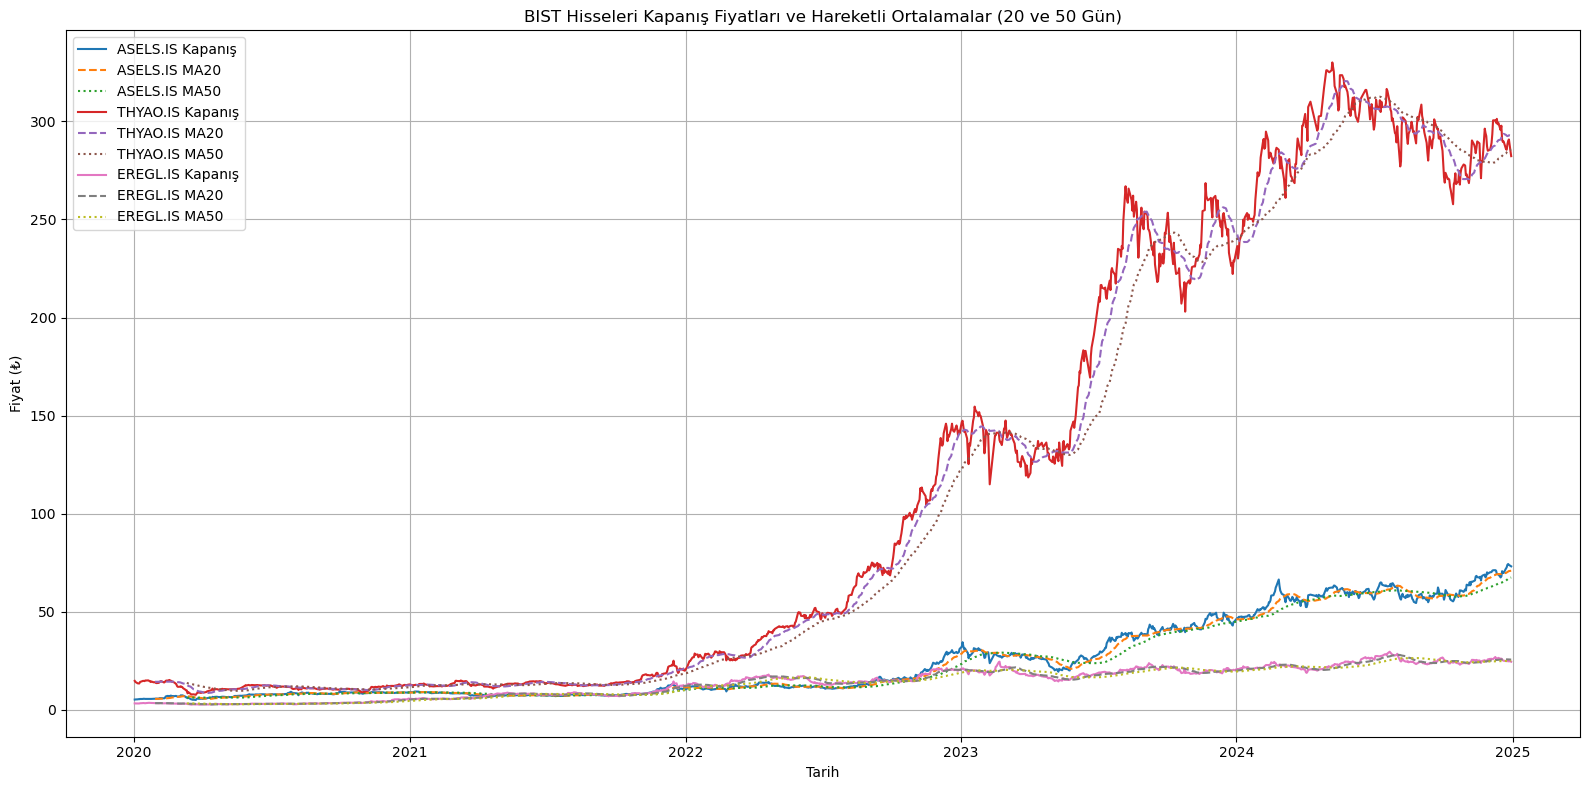

In [33]:
plt.figure(figsize=(16, 8))

for ticker in tickers:
    # Hisse verisi
    df = data_multi[ticker].dropna()
    # Hareketli ortalamalar
    ma20 = df.rolling(window=20).mean()
    ma50 = df.rolling(window=50).mean()
    
    plt.plot(df.index, df, label=f'{ticker} Kapanış', linewidth=1.5)
    plt.plot(ma20.index, ma20, label=f'{ticker} MA20', linestyle='--')
    plt.plot(ma50.index, ma50, label=f'{ticker} MA50', linestyle=':')
    
plt.title('BIST Hisseleri Kapanış Fiyatları ve Hareketli Ortalamalar (20 ve 50 Gün)')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (₺)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()